In [8]:
import numpy as np
from skimage.io import imread
import skimage.morphology as morph
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation as dilation
from skimage.morphology import binary_erosion as erosion
from skimage.morphology import disk
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import cv2
from skimage.measure import label

# Morfología matemática binaria

En este tutorial implementaremos múltiples operaciones morfológicas entre imágenes binarias a partir de la propiedad de dualidad entre la dilatación y la erosión. Posteriormente, emplearemos estas operaciones en tareas útiles en el análisis y procesamiento de imágenes como la extracción de contornos, el relleno de huecos y la extracción de componentes conexos.

## Dilatación 

La dilatación es una transformación morfológica, por lo tanto, y como se vio en clase, consiste en un análisis píxel a píxel empleando un elemento estructurante. La definición matemática de la dilatación está dada por la siguiente expresión:


<div>
<img src="def_dilatacion.png" width="250"/>
</div>


Esto se puede leer como todas las posibles traslaciones del origen de $\hat{B}$ tales que $A$ y $\hat{B}$ se sobreponen en **al menos un píxel.**

En pocas palabras, visualmente, la dilatacion consiste en que si el píxel central del elemento estructurante (B) coincide con un píxel del objeto (A), todos los píxeles recubiertos por B tomarán el mismo valor de los píxeles de A. Esto implica que la dilatación permite ensanchar los bordes de un objeto utilizando sus píxeles más cercanos en una o más direcciones. En términos prácticos, la dilatación aumenta el tamaño, rellena huecos y rellena bahías en los objetos. Adicionalmente, puede conectar objetos cercanos entre ellos.

En este taller, al basarse en morfología binaria, adoptaremos la convención que los píxeles pertenecientes a un objeto de interés tendrán una intensidad de 1. A continuación, se presenta una implementación de una función que retorna el resultado de la dilatación de una imagen empleando un elemento estructurante ingresado como parámetro:

In [9]:
# Parámetros:
# A: Imagen con objetos de interés marcados con intensidad 1
# B: Elemento estructurante. Sus dimensiones deben ser impares de tal forma que tenga un píxel central

def binary_dilatation(A, B):
    
    # Obtención de variables auxiliares
    m, n = B.shape
    a, b = (m - 1)//2, (n - 1)//2
    
    # Imagen con borde de ceros que permita central el elemento estructurante en aristas y vertices
    A_pad = np.block([[np.zeros((a, b)),         np.zeros((a, A.shape[1])),    np.zeros((a, b))],
                      [np.zeros((A.shape[0], b)),         A,                   np.zeros((A.shape[0], b))],
                      [np.zeros((a, b)),         np.zeros((a, A.shape[1])),    np.zeros((a, b))]])
    
    # Arreglo en el que se almacenará el resultado de la dilatación sobre la imagen con borde
    result_pad = np.copy(A_pad)
    
    # Para cada pixel del arreglo original
    for x in range(A.shape[0]):
        for y in range(A.shape[1]):
            # Cambio de coordenadas a la imagen con borde
            x_pad = x + a
            y_pad = y + b
            # Si el pixel en el que se centra el elemento estructurante es igual a 1
            if A_pad[x_pad, y_pad] == 1:
                # La imagen resultante tiene intensidad 1 en cada pixel sea 1 en la
                # imagen original o en el elemento estructurante
                result_pad[x_pad - a:x_pad + a + 1, y_pad - b: y_pad + b + 1] = np.logical_or(
                result_pad[x_pad - a:x_pad + a + 1, y_pad - b: y_pad + b + 1], B)
                
    # El resultado corresponde al arreglo sin borde para que se conserven las dimensiones de la imagen original
    result = result_pad[a: -a, b: -b]
    return result

A continuación, se ilustra el resultado de aplicar una dilatación empleando la función definida previamente sobre dos imágenes con elementos estructurantes distintos:

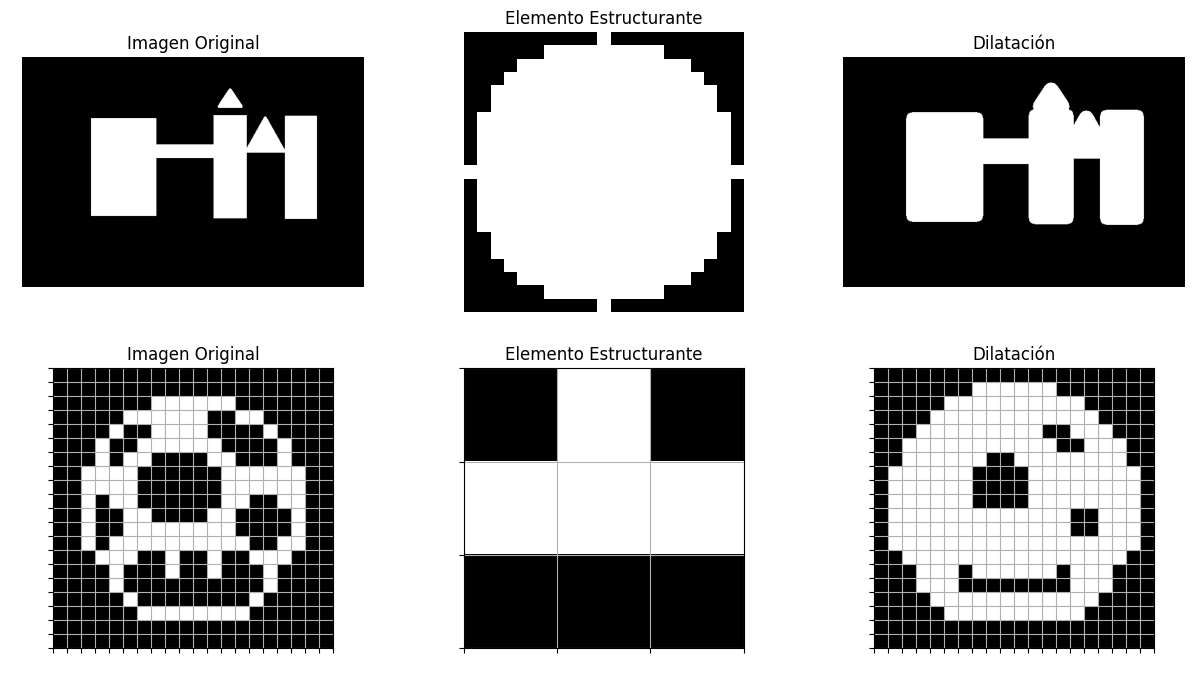

In [10]:
# Se leen las imagenes con los objetos de interés
geometry_img = imread('geometry.png', as_gray=True)
toad_img = imread('toad.png', as_gray=True)

# Se obtienen los elementos estructurantes a emplear
str_element_1 = morph.disk(10)
str_element_2 = np.array([[0,1,0],
                        [1,1,1],
                        [0,0,0]])

# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Dilatación')
plt.imshow(binary_dilatation(geometry_img, str_element_1), cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Dilatación')
plt.imshow(binary_dilatation(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

Existe una implementación de la dilatación en la librería skimage.morphology.

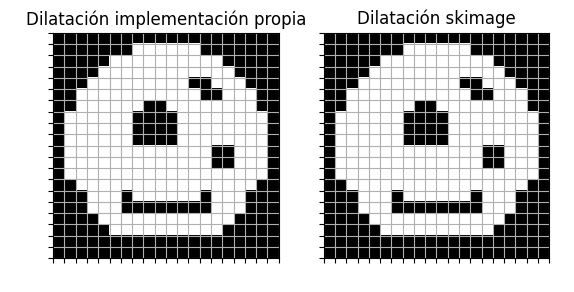

In [11]:
plt.subplot(121)
plt.title('Dilatación implementación propia')
plt.imshow(binary_dilatation(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(122)
plt.title('Dilatación skimage')
plt.imshow(dilation(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

## Erosión

La definición matemática de la erosión está dada por la siguiente expresión:

<div>
<img src="def_erosion-2.png" width="200"/>
</div>

Esto se puede leer como *todas las posibles posiciones del origen de $B$ tales que $B$ está completamente contenido en $A$*.

En pocas palabras, la erosión consiste en que si todo el elemento estructurante está contenido por el objeto, únicamente el píxel central tomará el valor de los píxeles de A. La erosión elimina los píxeles más cercanos a un objeto en una o más direcciones (adelgaza los bordes). En términos prácticos, la erosión remueve puntos aislados y partículas pequeñas, adelgaza y desconecta objetos, y elimina picos en sus contornos.

Sin embargo, a partir de las definiciones matemáticas provistas anteriormente podemos decir que la dilatación y la erosión son operaciones duales. Esta dualidad implica que se cumple la siguiente igualdad:

<div>
<img src="dualidad.png" width="200"/>
</div>

donde $A^C$ corresponde al complemento del conjunto representado por $A$, y $\hat{B}$ corresponde al elemento estructurante reflejado con respecto a su origen. 

A continuación, emplearemos esta dualidad para implementar una función que lleve a cabo la erosión partiendo de nuestra función creada para la dilatación. Esta función tendrá como parametro una imagen binaria y su elemento estructurante, y retornará la imagen erosionada, el elemento estructurante reflejado y el complemento de la imagen original.

In [12]:
def binary_erosion(A, B):
    # Complemento de A:
    A_c = 1 - A
    # Elemento estructurante reflejado:
    B_flip = np.flip(B)
    # Complemento de la dilatación entre estos dos conjuntos:
    result = 1 - binary_dilatation(A_c, B_flip)
    return result, A_c, B_flip

A continuación, se ilustra el resultado de aplicar una erosión sobre las dos imágenes previas con los mismos elementos estructurantes:

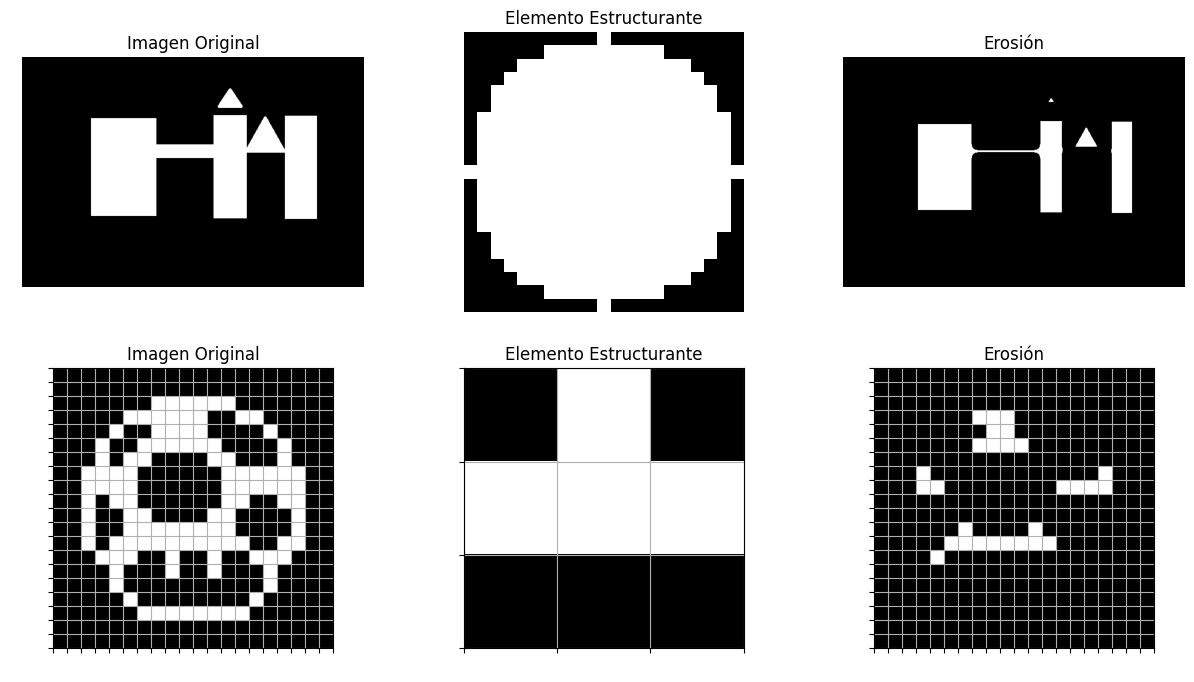

In [13]:
# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Erosión')
plt.imshow(binary_erosion(geometry_img, str_element_1)[0], cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Erosión')
plt.imshow(binary_erosion(toad_img, str_element_2)[0], cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

Existe una implementación de la erosión en la librería skimage.morphology.

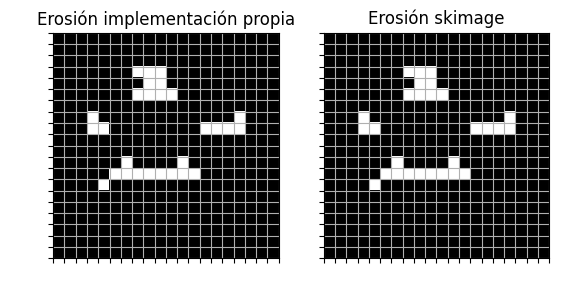

In [14]:
plt.subplot(121)
plt.title('Erosión implementación propia')
plt.imshow(binary_erosion(toad_img, str_element_2)[0], cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(122)
plt.title('Erosión skimage')
plt.imshow(erosion(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

## Apertura
La definición matemática de la apertura está dada por la siguiente expresión:

<div>
<img src="def_apertura.png" width="250"/>
</div>

Esto se puede leer como *la unión de todas las posibles traslaciones de $B$ que caen dentro de $A$*.

En pocas palabras, la apertura consiste en que si todo el elemento estructurante está contenido por el objeto, todos los píxeles cubiertos por el elemento estructurante seguirán perteneciendo al objeto. La apertura es similar a la erosión, pero preserva más información. Esta operación desecha objetos pequeños, mantiene objetos grandes con una forma muy similar, remueve pequeños detalles en el contorno, y puede desconectar algunas partículas y zonas de un objeto.

Es importante resaltar que la apertura es el resultado de aplicar una erosión seguida de una dilatación con el mismo elemento estructurante. Esto nos permite implementar de forma sencilla esta operación a partir de las funciones ya definidas:

In [15]:
def binary_opening(A, B):
    eroded = erosion(A, B)
    opening = dilation(eroded, B)
    return opening

A continuación, se ilustra el resultado de aplicar una apertura sobre las dos imágenes previas con los mismos elementos estructurantes:

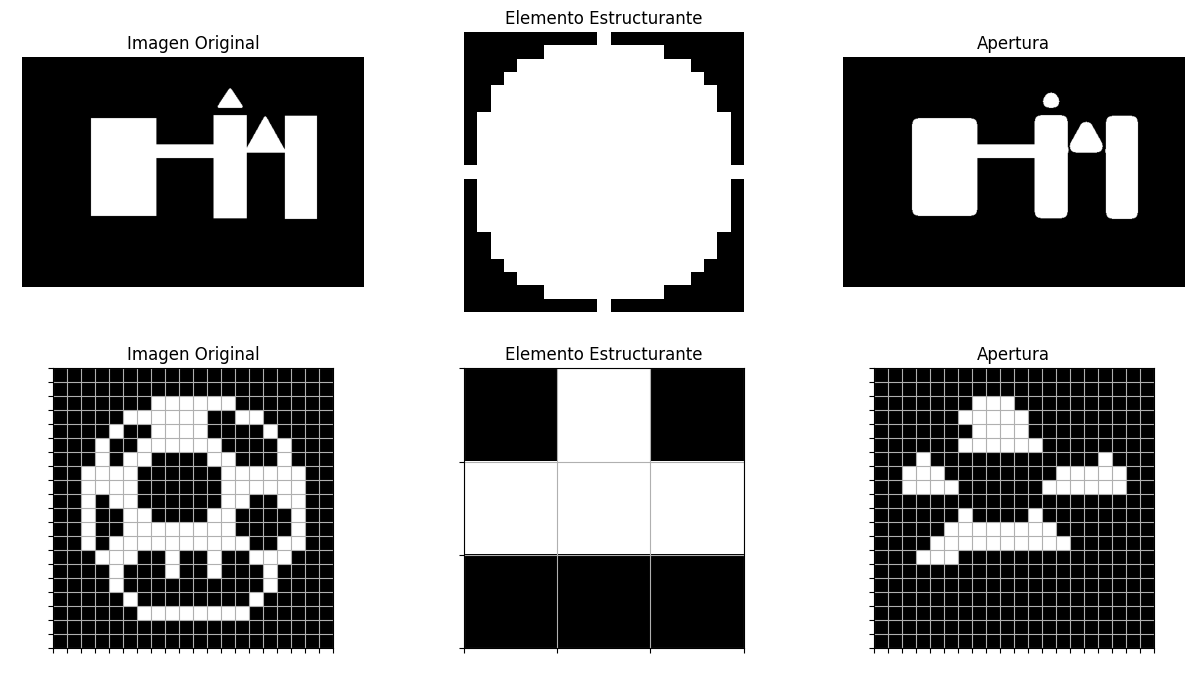

In [16]:
# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Apertura')
plt.imshow(binary_opening(geometry_img, str_element_1), cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Apertura')
plt.imshow(binary_opening(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

## Clausura

La clausura es la operación dual de la apertura. Esta operación equivale a aplicar una dilatación seguida de una erosión. Su resultado corresponde al conjunto de píxeles no recubiertos por el elemento estructurante cuando éste permanece enteramente fuera del objeto. Esta operación permite principalmente suavizar los contornos del objeto, rellenando las bahías. Debido a esto, podemos entender a la clausura como *todas las posibles traslaciones de $B$ que no se situan sobre $A$*. La dualidad entre clausura y apertura se puede expresar a través de la siguiente igualdad:

<div>
<img src="dualidad2.png" width="250"/>
</div>

A continuación, se presenta una implementación de la clausura a partir de las operaciones de dilatación y erosión:

In [17]:
def binary_closing(A, B):
    dilated = dilation(A, B)
    closing = erosion(dilated, B)
    return closing

A continuación, se ilustra el resultado de aplicar una clausura sobre las dos imágenes previas con los mismos elementos estructurantes:

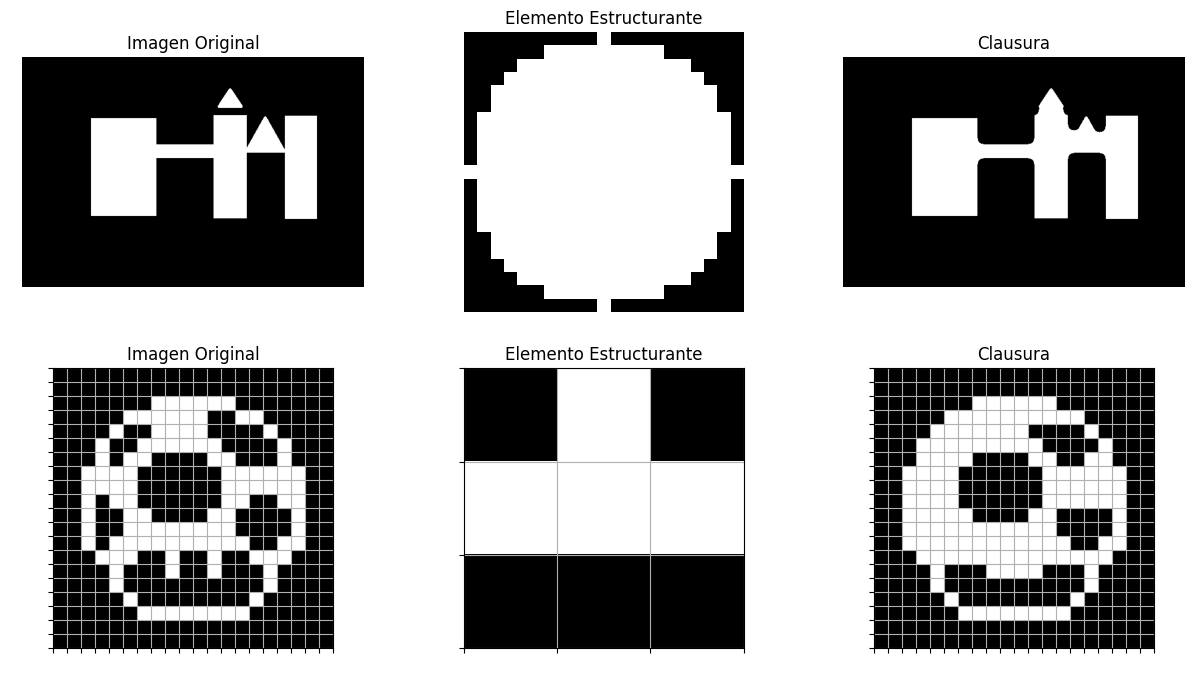

In [18]:
# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Clausura')
plt.imshow(binary_closing(geometry_img, str_element_1), cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Clausura')
plt.imshow(binary_closing(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

## Extracción de Contornos

Las operaciones morfológicas nos permiten extraer los contornos de una imagen binaria de forma sencilla. Esto se puede obtener al restar una erosión (con un elemento estructurante adecuado) a la imagen original, cuya expresión sería la siguiente:

<div>
<img src="contorno.png" width="250"/>
</div>

En términos prácticos esto puede parecer poco útil, ya que las imágenes naturales no tienden a ser binarias. Sin embargo, una vez se obtiene una máscara de segmentación de un objeto de interés mediante un método más complejo, esta operación resulta útil. Por ejemplo, tal como se muestra a continuación, una objeto de interés en una imagen bimodal puede segmentarse mediante umbralización por el método de otsu, y se puede extraer su contorno mediante la operación morfológica previamente descrita. Como base, se empleará la siguiente imagen:

<img src="wolf.jpg" width="500"/>

(np.float64(-0.5), np.float64(394.5), np.float64(262.5), np.float64(-0.5))

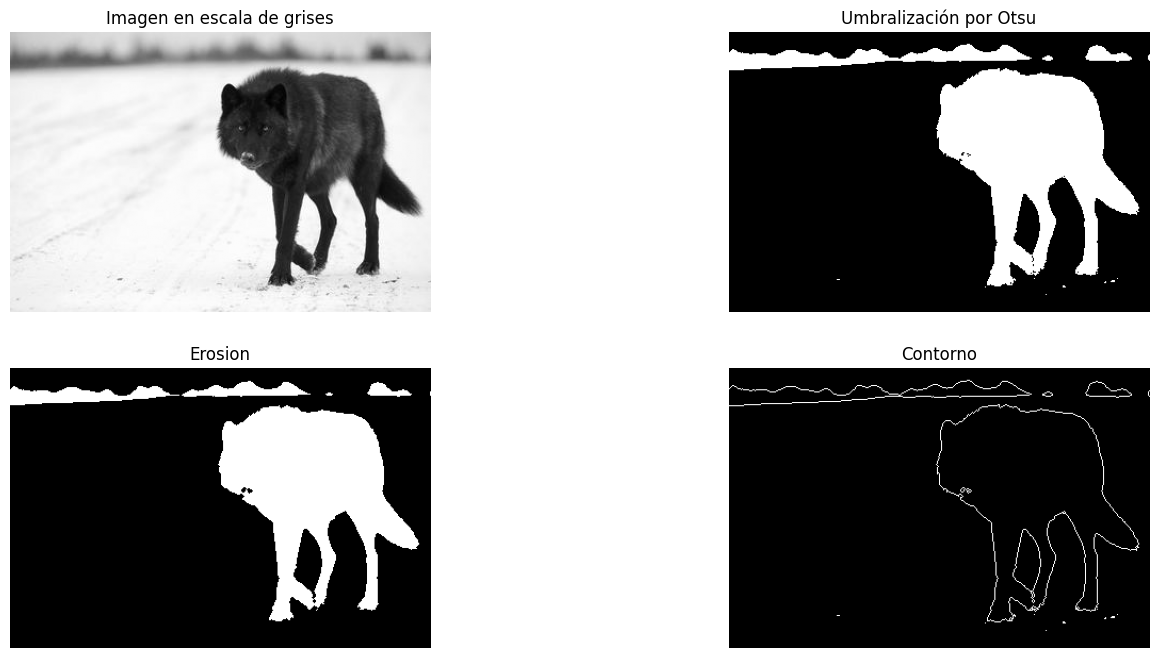

In [19]:
wolf_img = imread('wolf.jpg')
wolf_img_gray = rgb2gray(wolf_img)
thr_otsu = threshold_otsu(wolf_img_gray)
obj = (wolf_img_gray < thr_otsu).astype(int)
str_element_3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]])
erosion = binary_erosion(obj, str_element_3)[0]
contour = obj - erosion

plt.figure(figsize=(17, 8))
plt.subplot(221)
plt.title("Imagen en escala de grises")
plt.imshow(wolf_img_gray, cmap="gray")
plt.axis('Off')

plt.subplot(222)
plt.title("Umbralización por Otsu")
plt.imshow(obj, cmap="gray")
plt.axis('Off')

plt.subplot(223)
plt.title("Erosion")
plt.imshow(erosion, cmap='gray')
plt.axis('Off')

plt.subplot(224)
plt.title("Contorno")
plt.imshow(contour, cmap='gray')
plt.axis('Off')

Si bien después de la umbralización los árboles del fondo de la imagen fueron incluidos en la máscara de segmentación, en términos generales mediante este método morfológico se logró extraer un contorno adecuado para el lobo, siendo este nuestro objeto de interés. Además de extraer el contorno, podemos obtener el gradiente morfológico de la imagen según lo visto en clase.

In [20]:
from skimage.morphology import dilation, erosion, opening, closing
def morph_gradient(gray_img,EE):
    dil = dilation(gray_img,EE)
    ero = erosion(gray_img,EE)
    return dil-ero

## White top hat
Las operaciones morfologicas nos permiten analizar conjuntos complejos usando conjuntos simples que conocemos. De esta forma podemos extarer información de una imagen usado no solo sus intensidades, sino tambien el tamaño y la forma.

El white top hat es una operación morfologica que nos permite obtener los objetos brillantes más pequeños que el elemento estructurante. Esta operación se define como:

$W=I-I\circ B$

In [21]:
def W_th(I,B):
    W=I-binary_opening(I,B)
    return W

(np.float64(-0.5), np.float64(749.5), np.float64(419.5), np.float64(-0.5))

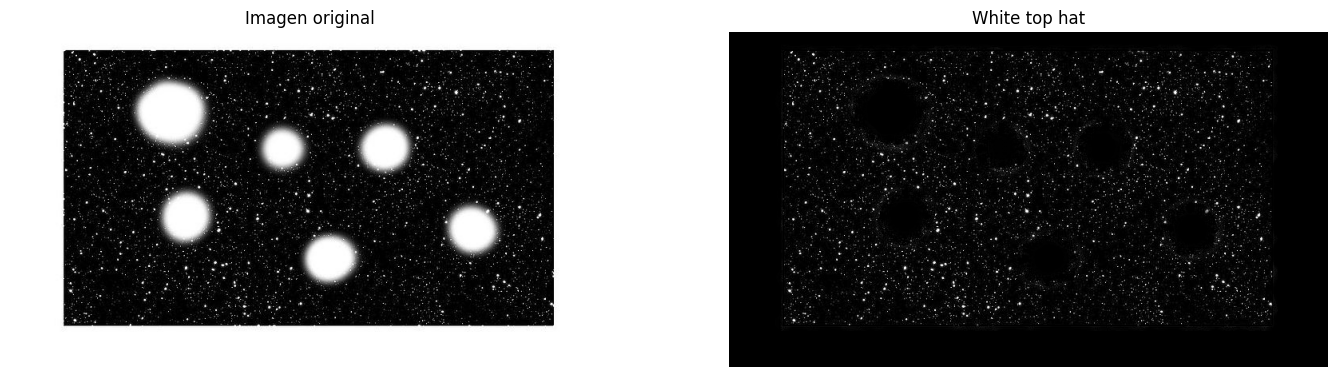

In [22]:
Cosmos_original = imread('Cosmos_original.jpg', as_gray=True)/255

plt.figure(figsize=(17, 8))
plt.subplot(121)
plt.title('Imagen original')
plt.imshow(Cosmos_original, cmap='gray')
plt.axis('Off')

plt.subplot(122)
plt.title('White top hat')
plt.imshow(W_th(Cosmos_original, str_element_1), cmap='gray')
plt.axis('Off')

## Dilatación geodésica

#No EXISTE E1

La dilatación geodésica consiste en dilatar e intersectar con una máscara iterativamente hasta que dos iteraciones consecutivas sean iguales. Sin embargo, es necesario tener una semilla como inicio para realizar la dilatación consecutiva. En esta ocasión, usaremos como mascara una segmentacíon previamente realizada, y como semilla escogeremos una erosión de la misma mascara con un elemento estructurante grande. El uso de un gran elemento estructurante para la erosión permite que solo sobrevivan pixeles de los elementos más grandes de la imagen, estos elementos serán los que recuperaremos con la dilatación geodesica.

### Ejercicio 1:
Cree una función que reciba por parametro la mascara, el elemento estructurante E1 con el que se erosionará, la semilla (o marcador) que correspondería a la erosión y el elemento estructurante E2 con el que se dilatará. Agregue una cantidad maxima de iteraciones para la dilatación para evitar un loop infinito. Esta función debe retornar la cantidad de iteraciones realizadas en la dilatación geodésica y el resultado final.

In [23]:
def geodesic_dilatation(mask, seed, E2, max_iterations):
    # result = ''  El resultado de la dilatación geodésica
    # iterations = '' El número de iteraciones hechas por el algoritmo
    
    anterior = seed.copy()
    iteraciones = 0
    
    for i in range(max_iterations):
        # Dilatar la semilla con E2
        dilatada = dilation(anterior, E2)
        # Intersección con la máscara
        result = np.logical_and(dilatada, mask)
        iteraciones += 1
        
        # Condición de estabilidad
        if np.array_equal(result, anterior):
            return result, iteraciones
        
        anterior = result

    return result, iteraciones

(np.float64(-0.5), np.float64(394.5), np.float64(262.5), np.float64(-0.5))

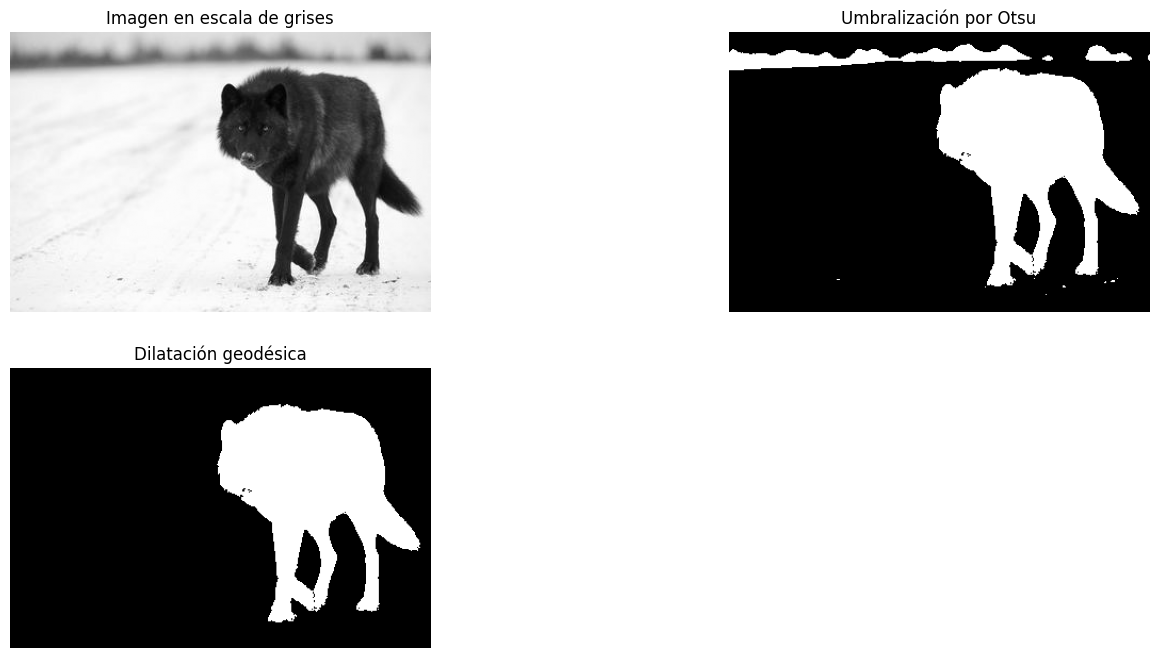

In [24]:
E1=morph.disk(10)
E2=morph.disk(2)
thr_otsu = threshold_otsu(wolf_img_gray)
obj = (wolf_img_gray < thr_otsu).astype(int)

seed=erosion(obj,E1)
g_d,iterations=geodesic_dilatation(obj,seed,E2,1000)

plt.figure(figsize=(17, 8))
plt.subplot(221)
plt.title("Imagen en escala de grises")
plt.imshow(wolf_img_gray, cmap="gray")
plt.axis('Off')

plt.subplot(222)
plt.title("Umbralización por Otsu")
plt.imshow(obj, cmap="gray")
plt.axis('Off')

plt.subplot(223)
plt.title("Dilatación geodésica")
plt.imshow(g_d, cmap="gray")
plt.axis('Off')

In [25]:
assert np.sum(g_d)<np.sum(g_d==0), 'Deberían haber más elementos de 0 en la dilatación geodesica'
assert iterations==44, 'Sus iteraciones debieron ser 44'
assert np.isclose(np.sum(g_d),20273) or np.isclose(np.sum(g_d),20275), 'Su implementación es erronea'

seed=erosion(obj,morph.disk(20))
g_d2,iterations2=geodesic_dilatation(obj,seed,E2,1000)

assert iterations2==62, 'Sus iteraciones debieron ser 62'
assert np.array_equal(g_d, g_d2), 'El resultado final de la dilatación geodésica debería ser igual con una erosión de disco 10 y 20'

### Ejercicio 2:
Cree una función que realice el proceso de relleno de huecos con el uso de la función de dilatación geodésica. A la función de relleno de huecos le entrará una imagen binaria, la cual será umbralizada. Además, la función de dilatación geodésica utilizará un disco con 1 de radio y un máximo de 1000 iteraciones.

Recuerde que para realizar el proceso necesitamos una máscara que podemos definir como complemento de la imagen original. Además, necesitamos un marcador que se define de la siguiente manera:

![Formula_1](Formula_1.png)

> **Nota:** La anterior imagen quiere decir que la semilla va a ser el resultado de restarle 1 a la imagen original en los bordes.

Donde el proceso general es el siguiente:

![Proceso](proceso.png)

In [26]:
def region_filling(img, E1 = disk(1), max_iterations = 1000):

    #máscara como complemento de la imagen original
    mascara = np.logical_not(img)

    # Definimos el marcador (bordes = 1 - img en los bordes)
    marcador = np.zeros_like(img)
    marcador[0, :] = 1 - img[0, :]
    marcador[-1, :] = 1 - img[-1, :]
    marcador[:, 0] = 1 - img[:, 0]
    marcador[:, -1] = 1 - img[:, -1]

    # Ejecutamos la dilatación geodésica
    resultado, _ = geodesic_dilatation(mascara, marcador, E1, max_iterations)

    # Combinamos para rellenar huecos
    result = np.logical_or(img, np.logical_not(resultado))# El resultado del relleno de huecos

    return result

(np.float64(-0.5), np.float64(291.5), np.float64(238.5), np.float64(-0.5))

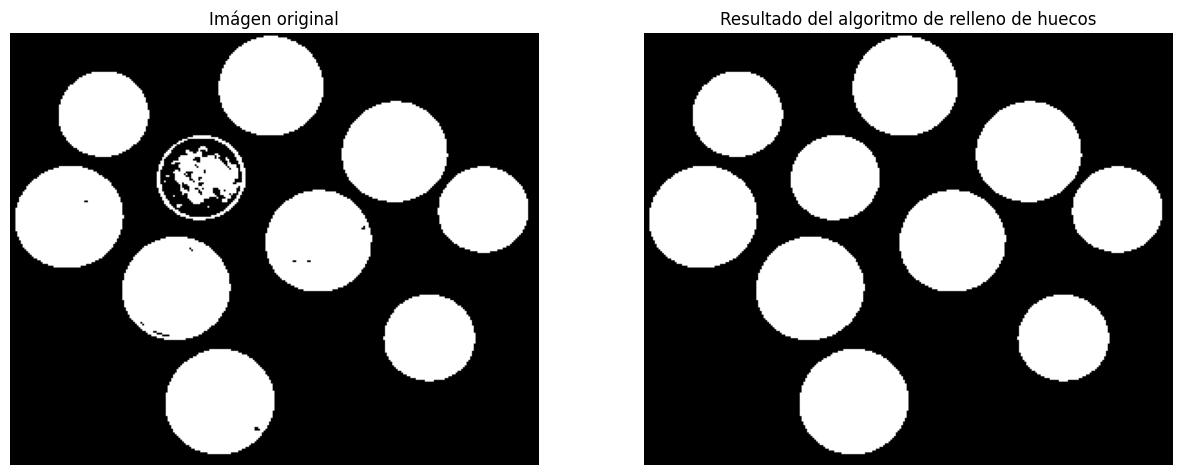

In [27]:
holes = imread("holes.png")
# Convertir la imagen a escala de grises y umbralizar
holes = cv2.cvtColor(holes, cv2.COLOR_BGR2GRAY) > 0.8
region_fill = region_filling(holes)

assert np.isclose(len(np.unique(label(region_fill, 0))), 11, 0.1), "El número de regiones no es el que debería"
assert np.isclose(np.sum(region_fill), 22806, 0.1), "El algoritmo de relleno de huecos no funciona correctamente"

plt.figure(figsize=(15,10))

plt.subplot(121)
plt.title("Imágen original")
plt.imshow(holes, cmap='gray')
plt.axis('off')


plt.subplot(122)
plt.title("Resultado del algoritmo de relleno de huecos")
plt.imshow(region_fill, cmap='gray')
plt.axis('off')

### Ejercicio 3

Luego de que implementamos la función de relleno de huecos, implementaremos otra de las aplicaciones que tiene la dilatación geodésica, la cual es la de eliminación de objetos que tocan el borde.

El proceso es muy similar al realizado para el relleno de huecos. Primero, el marcador se define de la siguiente manera:

![imagen](Eliminación_de_objetos_que_tocan_el_borde.png)

Ahora, para obtener la imagen final lo realizamos de la siguiente manera:
> 1. Realizaremos la dilatación geodésica con la imagen original y el marcador anterior.
> 2. Calcularemos la imagen complemento.
> 3. Finalmente, hallaremos la intersección entre la imagen complemento y la imagen original.

In [28]:
def border_clearing(img, E1 = disk(1), max_iterations = 1000):
    #crear marcador
    marcador = np.zeros_like(img)
    marcador[0, :] = img[0, :]
    marcador[-1, :] = img[-1, :]
    marcador[:, 0] = img[:, 0]
    marcador[:, -1] = img[:, -1]

    dilatado, _ = geodesic_dilatation(img, marcador, E1, max_iterations)

    # Complemento
    complemento = np.logical_not(dilatado)

    #Intersección con la imagen original
    result = np.logical_and(img, complemento)
    return result

(np.float64(-0.5), np.float64(229.5), np.float64(179.5), np.float64(-0.5))

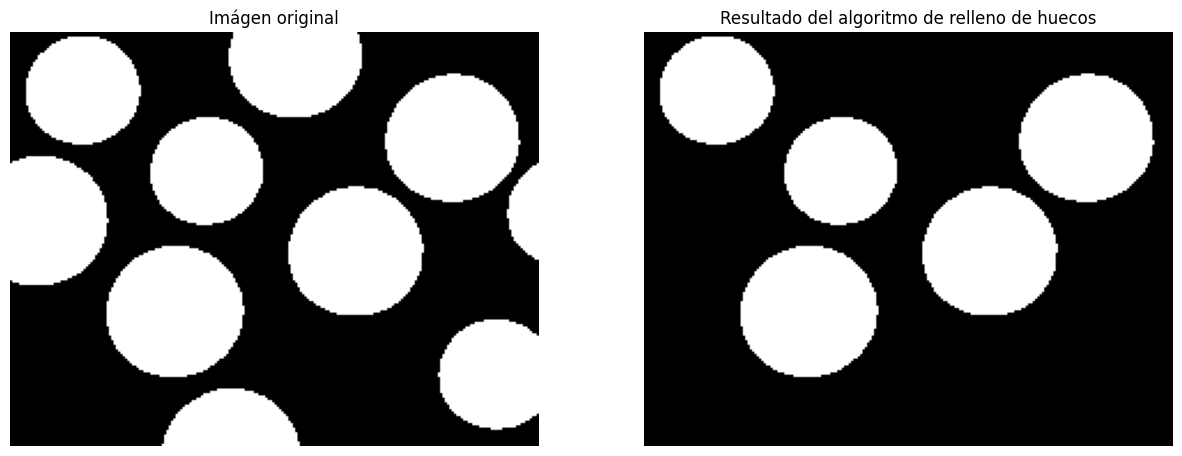

In [29]:
img_for_border_clearing = region_fill[20: 200, 20: 250]
border_clearing_img = border_clearing(img_for_border_clearing)

assert np.isclose(len(np.unique(label(border_clearing_img))), 6, 0.1), "El número de regiones no es el que debería"
assert np.isclose(np.sum(border_clearing_img), 11482, 0.1), "El algoritmo de elminación de objetos que tocan el borde no funciona correctamente"

plt.figure(figsize=(15,10))

plt.subplot(121)
plt.title("Imágen original")
plt.imshow(img_for_border_clearing, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title("Resultado del algoritmo de relleno de huecos")
plt.imshow(border_clearing_img, cmap='gray')
plt.axis('off')

## Créditos ##

Danniel Moreno - Jose Migue Abril Nova - Juan Camilo Lyons - Javier Santiago Vera Rincon - Felipe Escallón Páez - Jose Miguel Abril Nova